In [74]:
import numpy as np
import random
import copy
import math
import matplotlib.pyplot as plt

In [75]:
def euclidean_distance(city1, city2):
    x1, y1 = city1
    x2, y2 = city2
    return math.sqrt((x2 - x1)**2 + (y2 - y1)**2)

In [76]:
def swap(arr, i, j):
    arr[i], arr[j] = arr[j], arr[i]

In [77]:
def initialize_solution(num_cities):
    # Generisanje početnog rešenja, na primer, slučajnom permutacijom gradova
    solution = random.sample(range(num_cities), num_cities)
    return solution


In [78]:
def calculate_solution(solution, cities_coordinates):
    # Evaluacija rešenja na osnovu ukupnog rastojanja u TSP-u
    total_distance = 0
    num_cities = len(solution)
    
    for i in range(num_cities - 1):
        total_distance += euclidean_distance(cities_coordinates[solution[i]], cities_coordinates[solution[i + 1]])
    # Dodajemo rastojanje od poslednjeg do prvog grada
    total_distance += euclidean_distance(cities_coordinates[solution[-1]], cities_coordinates[solution[0]])
    return total_distance

In [79]:
def get_neighbors(current_solution):
    neighborhood = []
    n = len(current_solution)

    # Zamena dva nasumično odabrana grada
    for _ in range(n):
        i, j = random.sample(range(n), 2)
        neighbor = current_solution.copy()
        swap(neighbor, i, j)
        neighborhood.append(neighbor)

    # Inverzija dela puta
    for _ in range(n):
        i, j = sorted(random.sample(range(n), 2))
        neighbor = current_solution.copy()
        neighbor[i:j + 1] = reversed(neighbor[i:j + 1])
        neighborhood.append(neighbor)

    return neighborhood

In [80]:
def find_best_neighbor(non_tabu_neighbors, cities_coordinates):
    best_neighbor = None
    best_distance = float('inf')  # Postavljamo na beskonačno kao početnu vrednost

    for neighbor in non_tabu_neighbors:
        current_distance = calculate_solution(neighbor, cities_coordinates)

        if current_distance < best_distance:
            best_distance = current_distance
            best_neighbor = neighbor

    return best_neighbor

In [90]:
def tabu_search_tsp(cities_coordinates, max_iterations, tabu_tenure):
    # Inicijalizacija početnog rešenja
    current_solution = initialize_solution(len(cities_coordinates))
    best_solution = current_solution
    best_value = calculate_solution(current_solution, cities_coordinates)
    tabu_list = []
    
    for iteration in range(max_iterations):
        neighborhood = get_neighbors(current_solution)
        non_tabu_neighbors = [neighbor for neighbor in neighborhood if neighbor not in tabu_list]

        if not non_tabu_neighbors:
            # Svi susedi su na tabu listi, ponovno pokrećemo pretragu
            continue

        next_solution = find_best_neighbor(non_tabu_neighbors, cities_coordinates)
        tabu_list.append(next_solution)

        if len(tabu_list) > tabu_tenure:
            tabu_list.pop(0)  # Uklanjamo najstarije rešenje sa tabu liste
        
        value1 = calculate_solution(next_solution, cities_coordinates)
        value2 = calculate_solution(best_solution, cities_coordinates)
        
        if value1 < value2:
            best_solution = next_solution
            
            if value1 < best_value:
                best_value = value1

        current_solution = next_solution

    return best_solution, best_value

In [91]:
def read_coordinates_from_file(file_path):
    coordinates = []

    with open(file_path, 'r') as file:
        for line_number, line in enumerate(file, start=1):
            # Razdvajanje linije na delove pomoću razmaka
            parts = line.split()

            # Preskakanje praznih linija
            if not parts:
                continue

            # Provera da li linija sadrži tačno dva broja (x i y koordinate)
            if len(parts) != 2:
                print(f"Skipping line {line_number}: {line.strip()} (invalid values)")
                continue

            # Konvertovanje delova u float vrednosti
            try:
                x, y = map(float, parts)
            except ValueError:
                print(f"Skipping line {line_number}: {line.strip()} (invalid values)")
                continue

            # Dodavanje koordinata u listu
            coordinates.append((x, y))

    return coordinates

In [92]:
cities_coordinates = read_coordinates_from_file('tabu.txt')

In [93]:
#cities_coordinates = [(0, 0), (3, 4), (1, 1), (5, 2)]
best_solution, best_value = tabu_search_tsp(cities_coordinates, 100, 10)
print("Best TSP solution: ", best_solution)
print("Total distance: ", best_value)

Best TSP solution:  [4, 5, 1, 0, 2, 3]
Total distance:  42.52288808440906


In [94]:
def plot_tsp_solution(cities_coordinates, best_solution):
    # Extract x, y coordinates from the solution
    try:
        x_coords = [cities_coordinates[i][0] for i in best_solution]
        y_coords = [cities_coordinates[i][1] for i in best_solution]

        # Add the starting city to complete the cycle
        x_coords.append(x_coords[0])
        y_coords.append(y_coords[0])

        plt.figure(figsize=(8, 6))
        plt.plot(x_coords, y_coords, marker='o', linestyle='-', color='b')
        plt.title('TSP Solution')
        plt.xlabel('X Coordinate')
        plt.ylabel('Y Coordinate')
        plt.grid(True)
        plt.show()

    except IndexError as e:
        print(f"Error: {e}. Please check the values in best_solution and cities_coordinates.")


Visual representation of the path: 


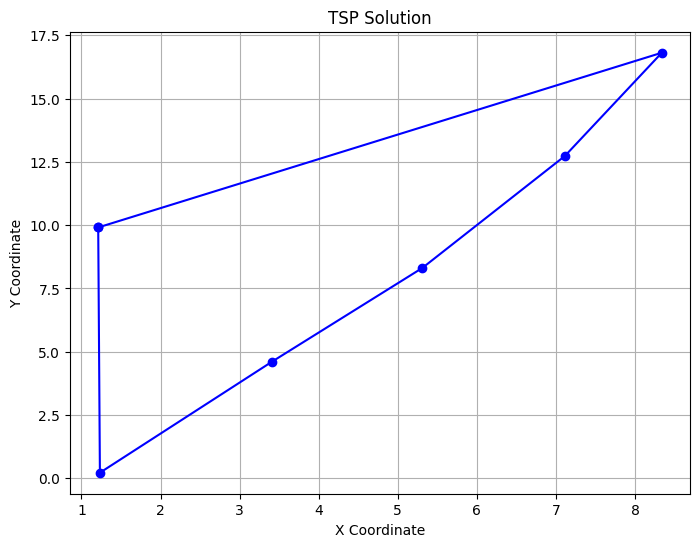

In [86]:
print("Visual representation of the path: ")
plot_tsp_solution(cities_coordinates, best_solution)